<a href="https://colab.research.google.com/github/ArifAygun/Applied-Machine-Learning-Feature-Engineering/blob/main/AA_AML_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 03_01**

## Explore The Data: What Data Are We Using?

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read In Data

In [1]:
# Read in the data from the data folder
import pandas as pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/

titanic = pd.read_csv("titanic.csv")
titanic.head()

Mounted at /content/drive/
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the number of rows and columns in the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Check the type of data stored in each column
titanic.shape


(891, 12)

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# See the distribution of our target variable
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

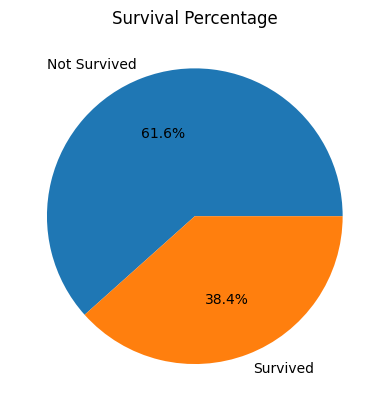

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset into a pandas dataframe
#titanic_df = pd.read_csv('titanic.csv')

# Create a pie chart of the "Survived" variable
survived_counts = titanic['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.show()


#**Part 03_02**

### Read In Data

In [9]:
# Read in the data from the data folder
import pandas as pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/

titanic = pd.read_csv("titanic.csv")
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore The Data: Explore Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read In Data

In [10]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore Continuous Features

In [11]:
# Look at the general distribution of these features
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
# Look at the correlation matrix
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

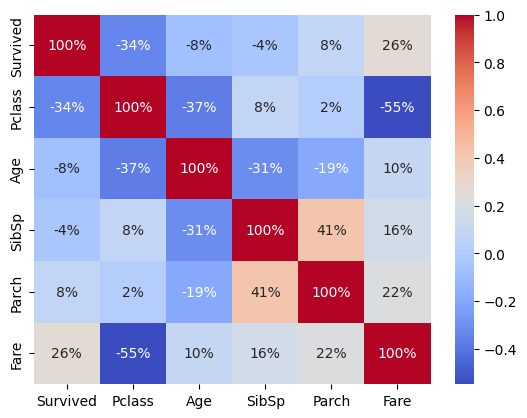

In [14]:
import seaborn as sns
import pandas as pd


# Compute the correlation matrix
corr_matrix = titanic.corr()

# Plot the correlation matrix using Seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.0%')


In [15]:
# Look at fare by different passenger class levels
titanic.groupby('Pclass')['Fare'].describe().T

Pclass,1,2,3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


<Axes: xlabel='Pclass', ylabel='Fare'>

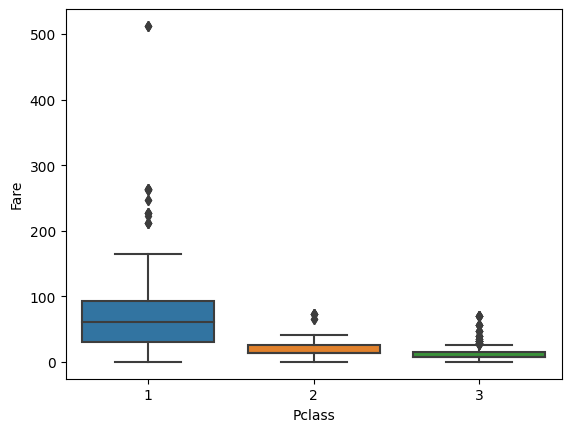

In [16]:
# Create a box plot of fare by passenger class level
sns.boxplot(x='Pclass', y='Fare', data=titanic)

In [17]:
from scipy import stats
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = titanic[titanic['Survived']==1][feature]
    not_survived = titanic[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [18]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

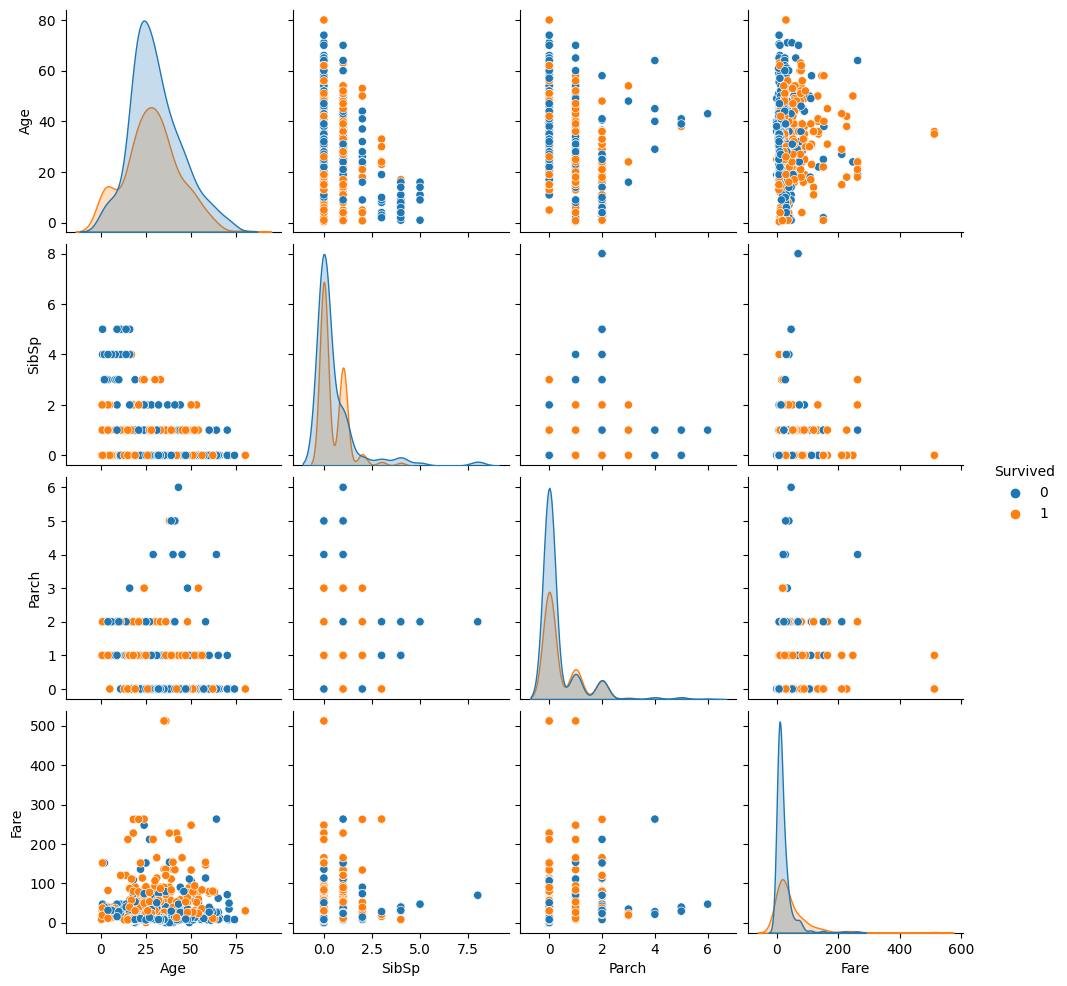

In [19]:
import seaborn as sns

# Select the continuous variables to include in the pairplot
cont_vars = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a pairwise scatterplot matrix for the continuous variables
sns.pairplot(data=titanic, vars=cont_vars, hue='Survived')


In [20]:
# Look at the average value of each feature based on whether Age is missing
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


<Axes: xlabel='AgeMissing', ylabel='Survived'>

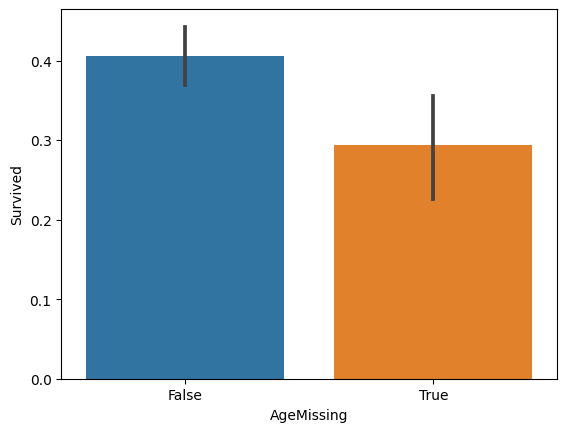

In [21]:
# Create a new column 'AgeMissing' indicating whether Age is missing or not
titanic['AgeMissing'] = titanic['Age'].isnull()

# Create a bar plot of the average value of each feature based on whether Age is missing or not
sns.barplot(x='AgeMissing', y='Survived', data=titanic)

#**Part 03_03**

### Read In Data

In [23]:
# Read in the data from the data folder
import pandas as pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/

titanic = pd.read_csv("titanic.csv")
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore The Data: Plot Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

### Plot Continuous Features

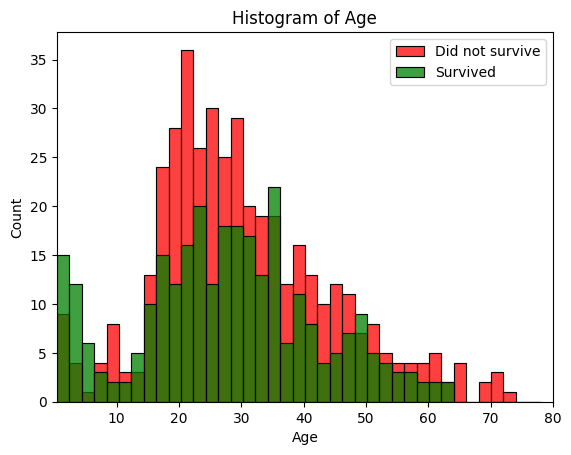

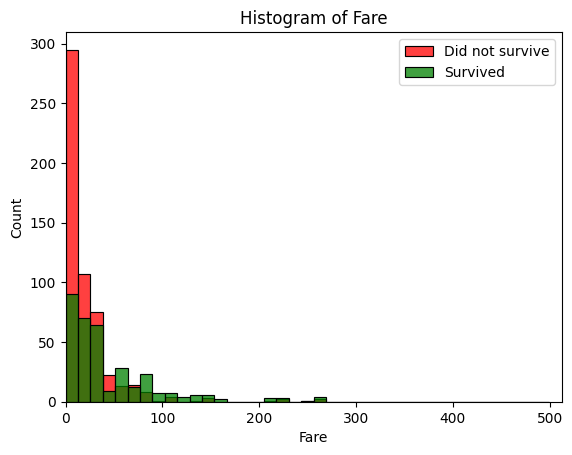

In [25]:
import seaborn as sns

def plot_histogram(feature):
    survived = titanic[titanic['Survived'] == 1][feature].dropna()
    died = titanic[titanic['Survived'] == 0][feature].dropna()
    xmin = min(min(survived), min(died))
    xmax = max(max(survived), max(died))
    width = (xmax - xmin) / 40
    fig, ax = plt.subplots()
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width), ax=ax)
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width), ax=ax)
    ax.set_xlim([xmin, xmax])
    ax.legend(['Did not survive', 'Survived'])
    ax.set_title('Histogram of {}'.format(feature))
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

for feature in ['Age', 'Fare']:
    plot_histogram(feature)


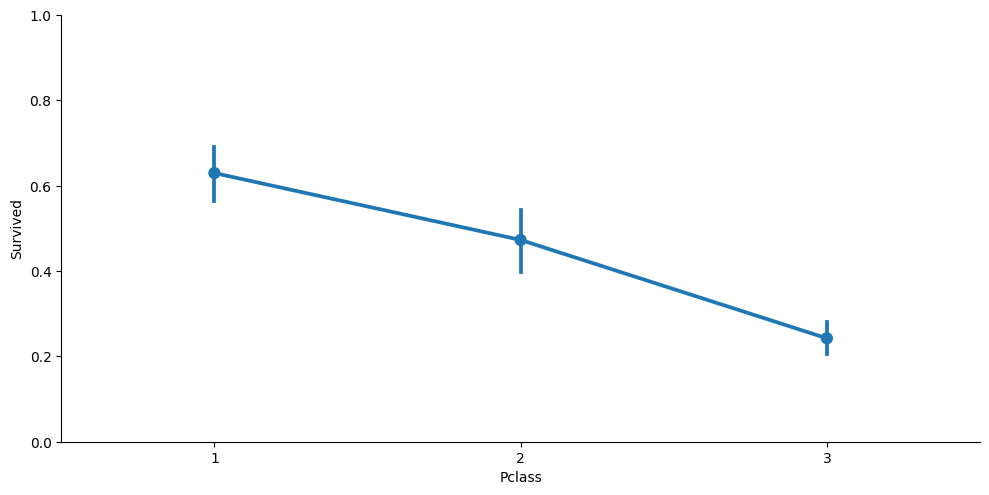

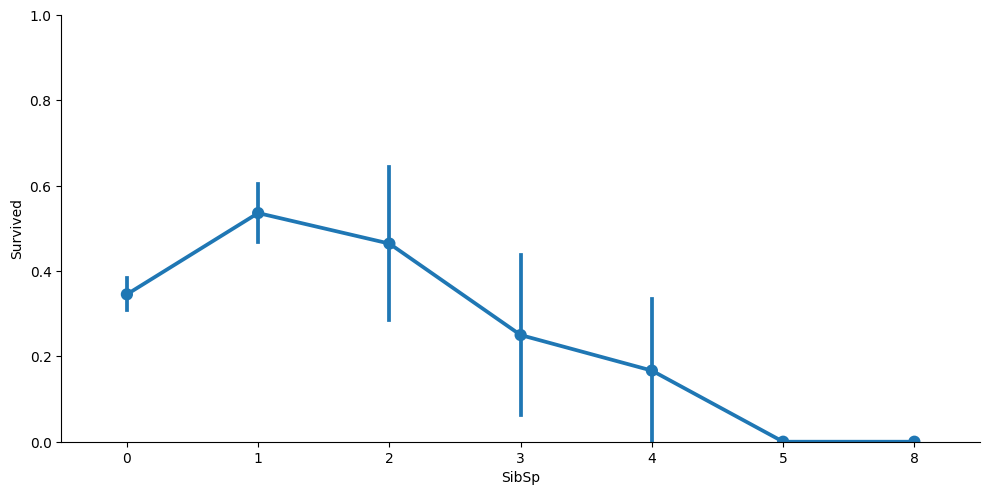

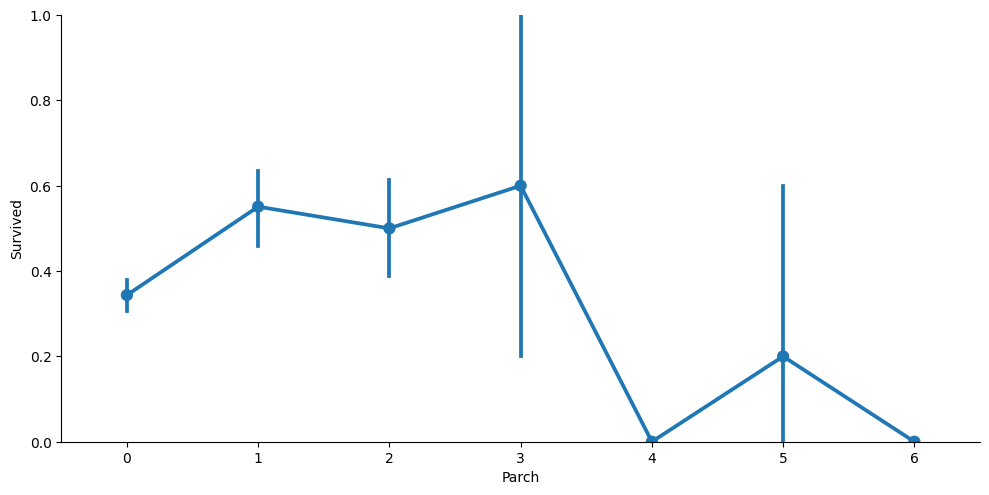

In [26]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

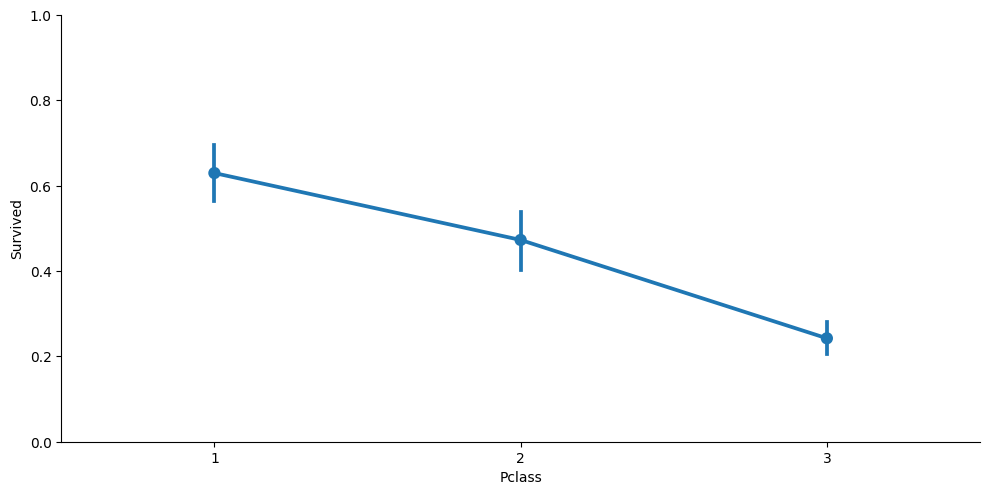

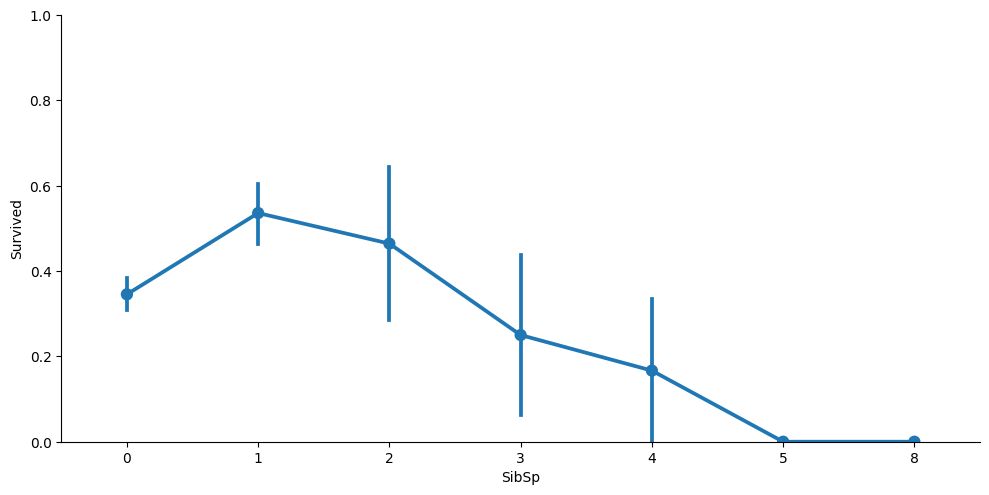

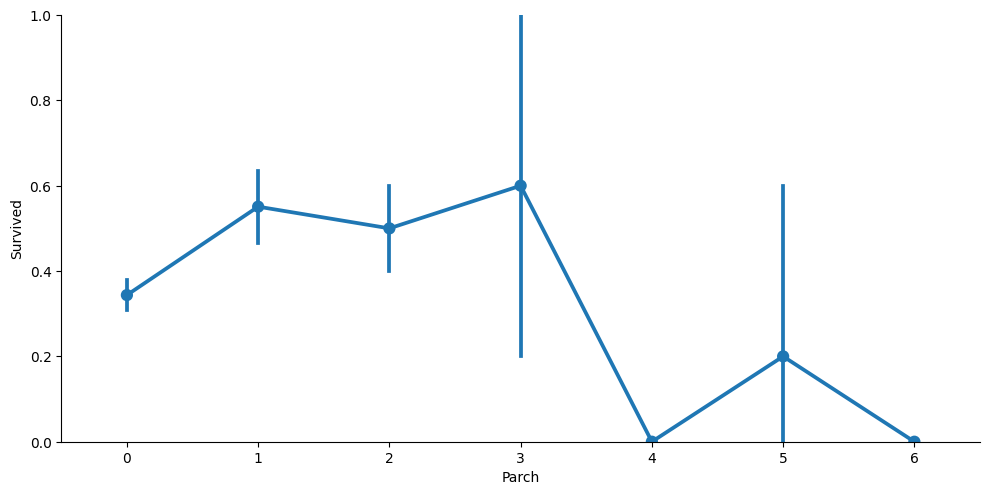

In [27]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

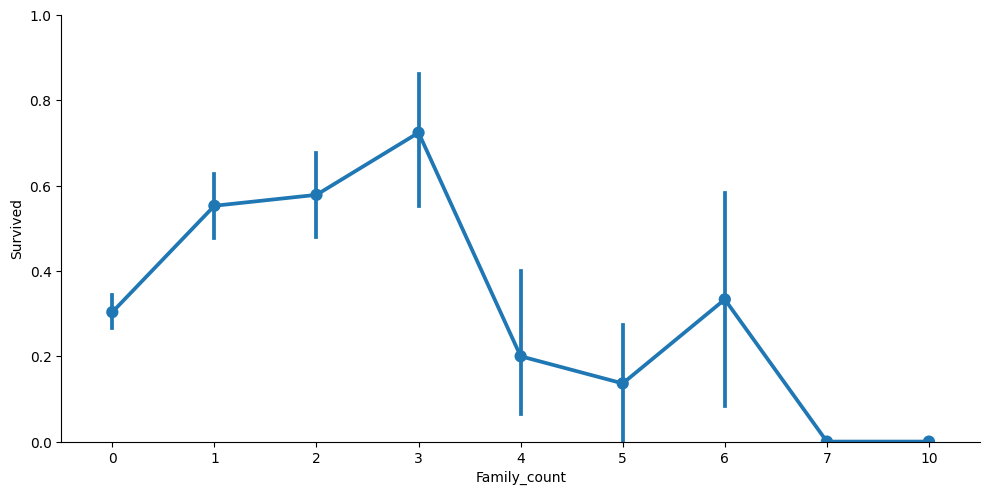

In [28]:
# Create a new family count feature
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_count', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

#**Part 03_04**

### Read In Data

In [30]:
# Read in the data from the data folder
import pandas as pd

import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/

titanic = pd.read_csv("titanic.csv")
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore The Data: Explore Categorical Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked` features.**

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


### Explore Categorical Features

In [33]:
# Check if there are any missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [34]:
# Explore the number of unique values for each feature
for col in titanic.columns:
    print('{}: {} unique values'.format(col, titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [35]:
# Check survival rate by gender
titanic.groupby('Sex').mean()

<ipython-input-35-9e33ce1940d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Sex').mean()


,Survived
Sex,
female,0.742038
male,0.188908


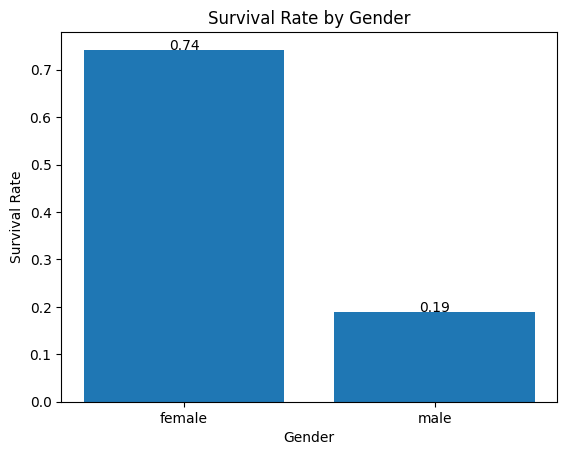

In [36]:
import matplotlib.pyplot as plt

# Group data by sex and calculate mean survival rate
survival_by_sex = titanic.groupby('Sex')['Survived'].mean()

# Create a bar chart with labels
fig, ax = plt.subplots()
ax.bar(survival_by_sex.index, survival_by_sex)
ax.set_title('Survival Rate by Gender')
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Gender')
for i, v in enumerate(survival_by_sex):
    ax.text(i, v, f"{v:.2f}", ha='center')
plt.show()


In [37]:
# Check survival rate by embarked (port departed from)
titanic.groupby('Embarked').mean()

<ipython-input-37-e0127d10ef44>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Embarked').mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


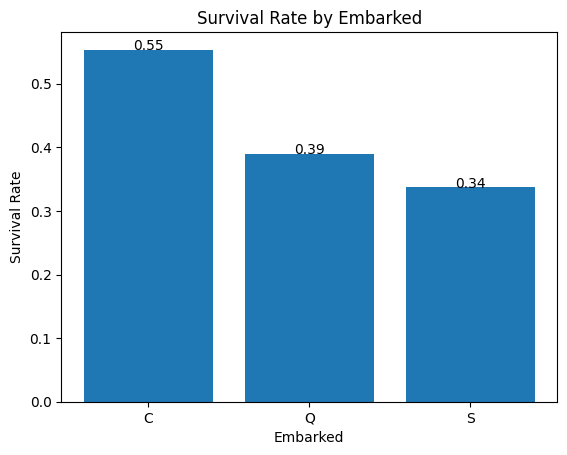

In [38]:
import matplotlib.pyplot as plt

# Group data by sex and calculate mean survival rate
survival_by_sex = titanic.groupby('Embarked')['Survived'].mean()

# Create a bar chart with labels
fig, ax = plt.subplots()
ax.bar(survival_by_sex.index, survival_by_sex)
ax.set_title('Survival Rate by Embarked')
ax.set_ylabel('Survival Rate')
ax.set_xlabel('Embarked')
for i, v in enumerate(survival_by_sex):
    ax.text(i, v, f"{v:.2f}", ha='center')
plt.show()

In [39]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

<ipython-input-39-9cdc33b72f06>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(titanic['Cabin'].isnull()).mean()


,Survived
Cabin,
False,0.666667
True,0.299854


<Axes: >

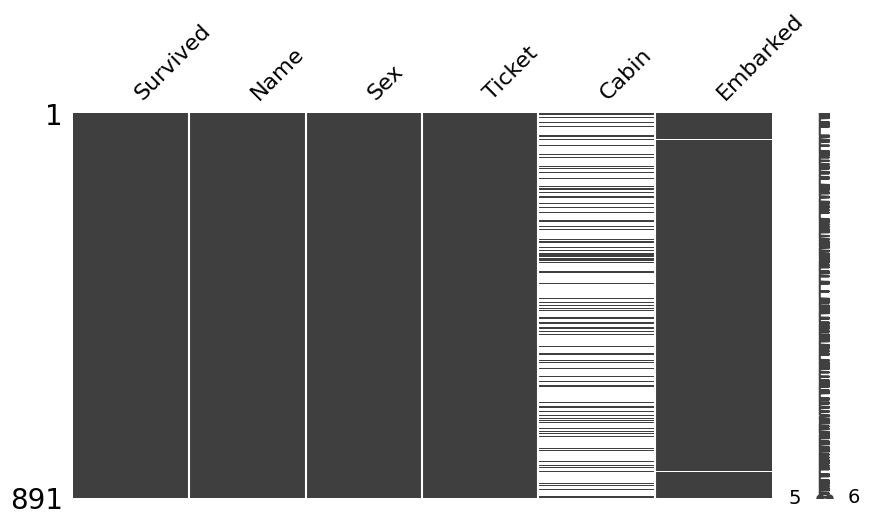

In [41]:
import missingno as msno

# Plot the missing values of the Cabin feature
msno.matrix(titanic, figsize=(10,5))


In [42]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [43]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [44]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

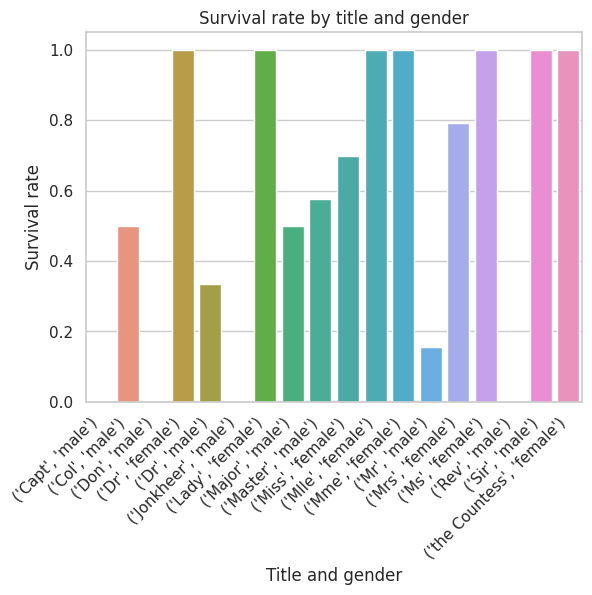

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Create pivot table
table = titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

# Plot data
sns.set(style="whitegrid")
ax = sns.barplot(x=table.index.to_flat_index(), y=table[('mean','Survived')])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels
ax.set_title('Survival rate by title and gender')
ax.set_xlabel('Title and gender')
ax.set_ylabel('Survival rate')

# Show plot
plt.show()
